<a href="https://colab.research.google.com/github/BIGMOUSSA/Healthy_prognosis_multiclassififcation/blob/main/Projet_data_healthy_emergency2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#h_data=pd.read_csv("/content/drive/MyDrive/Projet_data_Training.csv")
databis=pd.read_csv("/content/drive/MyDrive/health_dataset.csv")
#data2=h_data.drop_duplicates()
databis

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#databis.prognosis.unique().shape

DATA EXPLORATION SUR LA CIBLE

In [ ]:
#
data2.prognosis.value_counts()

Hepatitis D                                10
Dengue                                     10
Chicken pox                                10
Migraine                                   10
Hepatitis B                                 9
Hypoglycemia                                9
Common Cold                                 9
Tuberculosis                                9
Hepatitis E                                 9
hepatitis A                                 9
Typhoid                                     9
Hyperthyroidism                             9
Jaundice                                    9
Diabetes                                    9
Pneumonia                                   9
Varicose veins                              8
Malaria                                     8
Hypothyroidism                              8
Alcoholic hepatitis                         8
Chronic cholestasis                         8
Osteoarthristis                             7
Bronchial Asthma                  

APPLIQUONS ENSEMBLE CLASSIFIER AUX DONNEES ET CALCULONS L ACCURACY

In [ ]:

target_name = "Disease"
data = data2.drop("prognosis",axis=1)
target = data2[target_name]

In [ ]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector

categorical_encoder = OneHotEncoder(handle_unknown="ignore"
)
preprocessor = make_column_transformer(
    (categorical_encoder, make_column_selector(dtype_include=object)),
    remainder="passthrough"
)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

pipeline = make_pipeline(property,DecisionTreeClassifier(random_state=0))
tree = DecisionTreeClassifier(random_state=0)


In [ ]:
from sklearn.model_selection import cross_val_score

scores_tree = cross_val_score(tree, data, target)

print(f"Decision tree classifier: "
      f"{scores_tree.mean():.3f} +/- {scores_tree.std():.3f}")

Decision tree classifier: 0.628 +/- 0.142


In [ ]:
scores_tree

array([0.90163934, 0.62295082, 0.52459016, 0.57377049, 0.51666667])

In [ ]:
from sklearn.ensemble import BaggingClassifier

bagged_trees = make_pipeline(
    BaggingClassifier(
        base_estimator=DecisionTreeClassifier(random_state=0),
        n_estimators=50, n_jobs=2, random_state=0,
    )
)

In [ ]:
scores_bagged_trees = cross_val_score(bagged_trees, data, target)

print(f"Bagged decision tree classifier: "
      f"{scores_bagged_trees.mean():.3f} +/- {scores_bagged_trees.std():.3f}")

Bagged decision tree classifier: 0.977 +/- 0.013


In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = make_pipeline(
    RandomForestClassifier(n_estimators=50, n_jobs=2, random_state=0)
)

In [ ]:
scores_random_forest = cross_val_score(random_forest, data, target)

print(f"Random forest classifier: "
      f"{scores_random_forest.mean():.3f} +/- "
      f"{scores_random_forest.std():.3f}")

Random forest classifier: 1.000 +/- 0.000


In [ ]:
scores_random_forest

array([1., 1., 1., 1., 1.])

In [ ]:
data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
403,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
405,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
406,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1, stratify=target)

In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
bagged_trees.fit(X_train,y_train)

Pipeline(steps=[('baggingclassifier',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0),
                                   n_estimators=50, n_jobs=2,
                                   random_state=0))])

In [ ]:
y_test

194             hepatitis A
82          Gastroenteritis
300          Varicose veins
126    Cervical spondylosis
112                Migraine
               ...         
237             Hepatitis E
93         Bronchial Asthma
242     Alcoholic hepatitis
312          Hypothyroidism
222             Hepatitis D
Name: prognosis, Length: 76, dtype: object

In [ ]:

# Make predictions for the test set
y_pred_test = bagged_trees.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred_test)

0.9605263157894737

In [ ]:
# Make predictions for the test set
y_pred_test = forest.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred_test)

In [ ]:

# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 2]])

In [ ]:
list(target.unique())

['Fungal infection',
 'Allergy',
 'GERD',
 'Chronic cholestasis',
 'Drug Reaction',
 'Peptic ulcer diseae',
 'AIDS',
 'Diabetes ',
 'Gastroenteritis',
 'Bronchial Asthma',
 'Hypertension ',
 'Migraine',
 'Cervical spondylosis',
 'Paralysis (brain hemorrhage)',
 'Jaundice',
 'Malaria',
 'Chicken pox',
 'Dengue',
 'Typhoid',
 'hepatitis A',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Alcoholic hepatitis',
 'Tuberculosis',
 'Common Cold',
 'Pneumonia',
 'Dimorphic hemmorhoids(piles)',
 'Heart attack',
 'Varicose veins',
 'Hypothyroidism',
 'Hyperthyroidism',
 'Hypoglycemia',
 'Osteoarthristis',
 'Arthritis',
 '(vertigo) Paroymsal  Positional Vertigo',
 'Acne',
 'Urinary tract infection',
 'Psoriasis',
 'Impetigo']

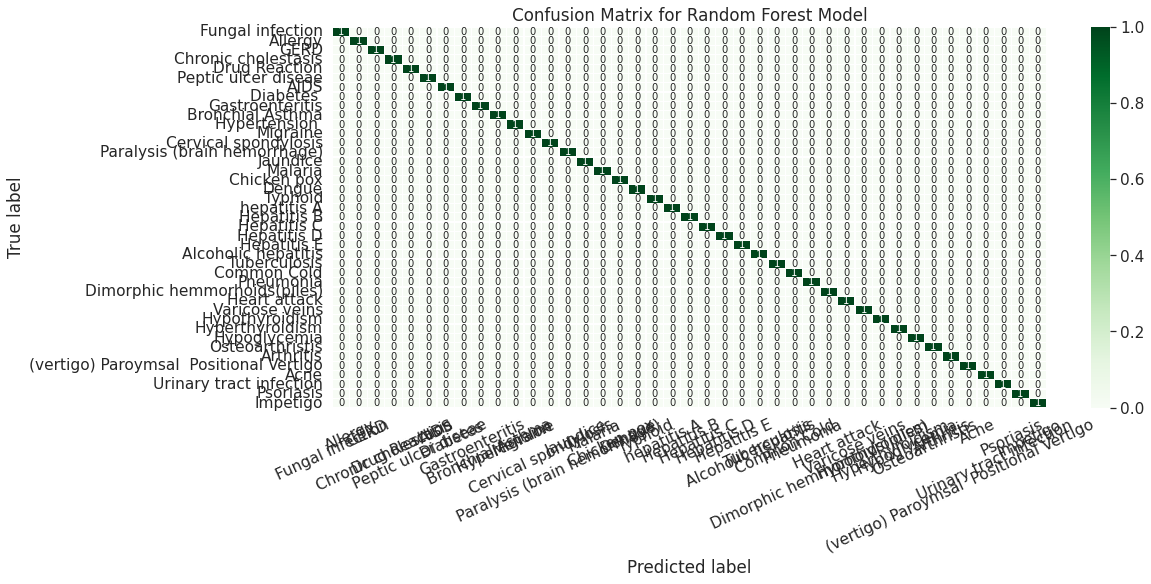

In [ ]:

########################################################
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = list(target.unique())
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()
#####################################


In [ ]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))
####################################

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         2
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         2
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         2
                   Cervical spondylosis       1.00      1.00      1.00         2
                            Chicken pox       1.00      1.00      1.00         3
                    Chronic cholestasis       1.00      1.00      1.00         2
                            Common Cold       1.00      1.00      1.00         2
                           

In [ ]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.ensemble import RandomForestRegressor

param_distributions = {
    "n_estimators": [1, 2, 5, 10, 20],
    "max_leaf_nodes": [2, 5, 10, 20],
}
search_cv = RandomizedSearchCV(
    RandomForestClassifier(n_jobs=2), param_distributions=param_distributions,
    scoring="neg_mean_absolute_error", n_iter=10, random_state=0, n_jobs=2,
)
search_cv.fit(data_train, target_train)

columns = [f"param_{name}" for name in param_distributions.keys()]
columns += ["mean_test_error", "std_test_error"]
cv_results = pd.DataFrame(search_cv.cv_results_)
cv_results["mean_test_error"] = -cv_results["mean_test_score"]
cv_results["std_test_error"] = cv_results["std_test_score"]
cv_results[columns].sort_values(by="mean_test_error")